# Regression Trees
---

### Objectives:

- Perform basic data preprocessing using Scikit-Learn
- Model a regression task using Scikit-Learn
- Train a Decision Tree Regressor model
- Run inference and assess the quality of the trained models

### Installs:

In [0]:
%%capture
%pip install numpy==2.4.0
%pip install pandas==2.3.3
%pip install scikit-learn==1.8.0
%pip install matplotlib==3.10.8
%pip install seaborn==0.13.0

In [0]:
# Command to restart the kernel and update the installed libraries
%restart_python

### Imports:

In [0]:
# Data Analize and Visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns

# Data Modeling / Model Linear / Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

### Load the data

In [0]:
df = pd.read_csv('./data/yellow-tripdata.csv')

### Verify successful load with some randomly selected records


In [0]:
df.sample(9)

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
5876,2,1,5.19,2,1,132,197,1,70.0,0.5,6.94,1,16.19
7505,2,1,19.00,2,1,132,249,1,70.0,0.5,0.00,1,12.88
24209,2,1,18.25,2,1,132,234,1,70.0,0.5,6.94,1,16.19
19159,2,1,19.83,2,1,132,158,1,70.0,0.5,6.94,1,16.19
18548,2,1,18.62,2,1,132,48,1,70.0,0.5,6.94,1,16.54
27918,2,1,17.57,2,1,132,114,1,70.0,0.5,6.94,1,16.54
34672,2,1,18.40,2,1,132,113,1,70.0,0.5,0.00,1,5.00
39484,2,3,18.17,2,1,132,48,1,70.0,0.5,6.94,1,15.00
24859,2,1,19.74,2,1,132,141,1,70.0,0.5,6.94,1,16.19



### Understand the data

---

These data represent individual taxi trips performed in New York City. The dataset was collected and provided to the NYC Taxi and Limousine Commission (TLC) by authorized technology providers. Each row corresponds to a single trip and contains details such as pick-up and drop-off locations, trip distance, and itemized fare components.

The goal is to build a regression tree model to predict the amount of tip paid by the passenger. The model will use trip characteristics (like distance, location, and base fare) to estimate the **tip_amount** variable.

* **VendorID** *Categorical* - A code indicating the TPEP provider that provided the record.

* **passenger_count** *Integer* - The number of passengers in the vehicle (driver entered value).

* **trip_distance** *Continuous* - The elapsed trip distance in miles reported by the taximeter.

* **RatecodeID** *Categorical* - The final rate code in effect at the end of the trip (e.g., Standard rate, JFK, Newark).

* **store_and_fwd_flag** *Categorical* - This flag indicates whether the trip record was held in vehicle 
memory before sending to the vendor because the vehicle did not have a connection to the server.

* **PULocationID** *Categorical* - TLC Taxi Zone in which the taximeter was engaged (Pick-up location).

* **DOLocationID** *Categorical* - TLC Taxi Zone in which the taximeter was disengaged (Drop-off location).

* **payment_type** *Categorical* - A numeric code signifying how the passenger paid for the trip (e.g., Credit card, Cash).
* **fare_amount** *Continuous* - The time-and-distance fare calculated by the meter.

* **mta_tax** *Continuous* - A tax automatically triggered based on the metered rate in use.

* **tolls_amount** *Continuous* - Total amount of all tolls paid in trip.

* **improvement_surcharge** *Continuous* - Surcharge assessed on hailed trips at the flag drop.

* **tip_amount** *Continuous* - This field is automatically populated for credit card tips. Cash tips are not included. (Target Variable)

### Explore the data
First, consider a statistical summary of the data.

In [0]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
count,41202.0,41202.000000,41202.000000,41202.000000,41202.000000,41202.000000,41202.000000,41202.0,41202.000000,41202.000000,41202.000000,41202.000000,41202.000000
mean,2.0,1.633926,18.384928,2.025411,0.999393,132.220475,164.546333,1.0,69.986150,0.491020,5.608198,0.999976,14.107666
std,0.0,0.924250,2.856605,0.461587,0.024625,7.726159,67.901529,0.0,6.184851,0.066404,2.979348,0.004927,5.030619
min,2.0,1.000000,0.000000,1.000000,0.000000,10.000000,3.000000,1.0,3.700000,0.000000,0.000000,0.000000,0.010000
25%,2.0,1.000000,17.370000,2.000000,1.000000,132.000000,113.000000,1.0,70.000000,0.500000,6.940000,1.000000,10.000000
50%,2.0,1.000000,18.180000,2.000000,1.000000,132.000000,163.000000,1.0,70.000000,0.500000,6.940000,1.000000,16.190000
75%,2.0,2.000000,19.380000,2.000000,1.000000,132.000000,231.000000,1.0,70.000000,0.500000,6.940000,1.000000,16.190000
max,2.0,8.000000,189.910000,5.000000,1.000000,264.000000,265.000000,1.0,199.700000,0.500000,57.000000,1.000000,98.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41202 entries, 0 to 41201
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               41202 non-null  int64  
 1   passenger_count        41202 non-null  int64  
 2   trip_distance          41202 non-null  float64
 3   RatecodeID             41202 non-null  int64  
 4   store_and_fwd_flag     41202 non-null  int64  
 5   PULocationID           41202 non-null  int64  
 6   DOLocationID           41202 non-null  int64  
 7   payment_type           41202 non-null  int64  
 8   fare_amount            41202 non-null  float64
 9   mta_tax                41202 non-null  float64
 10  tolls_amount           41202 non-null  float64
 11  improvement_surcharge  41202 non-null  int64  
 12  tip_amount             41202 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 4.1 MB


In [0]:
df.isnull().sum()

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
mta_tax                  0
tolls_amount             0
improvement_surcharge    0
tip_amount               0
dtype: int64

### Checking Variables Correlations for to understand dataset

In [0]:
df.corr()['tip_amount'].abs().sort_values(ascending = False)

tip_amount               1.000000
fare_amount              0.200638
tolls_amount             0.116172
trip_distance            0.101819
RatecodeID               0.094075
mta_tax                  0.054488
DOLocationID             0.024348
PULocationID             0.023086
passenger_count          0.015081
improvement_surcharge    0.000727
store_and_fwd_flag       0.000320
VendorID                      NaN
payment_type                  NaN
Name: tip_amount, dtype: float64

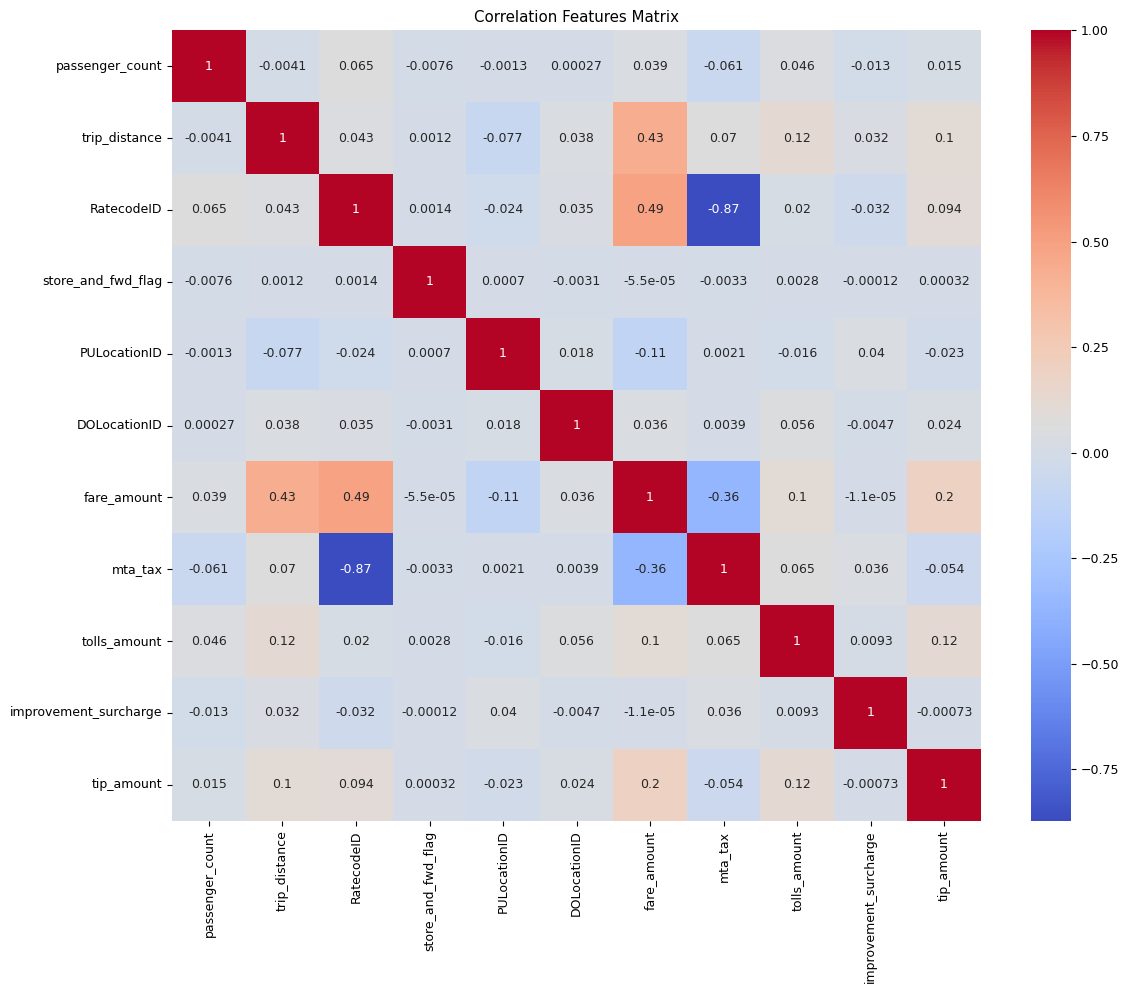

In [0]:
plt.rc('font', size = 9)
fig, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(df.drop(columns = ['VendorID', 'payment_type']).corr(), annot = True, cmap = 'coolwarm', ax = ax)
ax.set_title('Correlation Features Matrix')
plt.tight_layout()
plt.show()

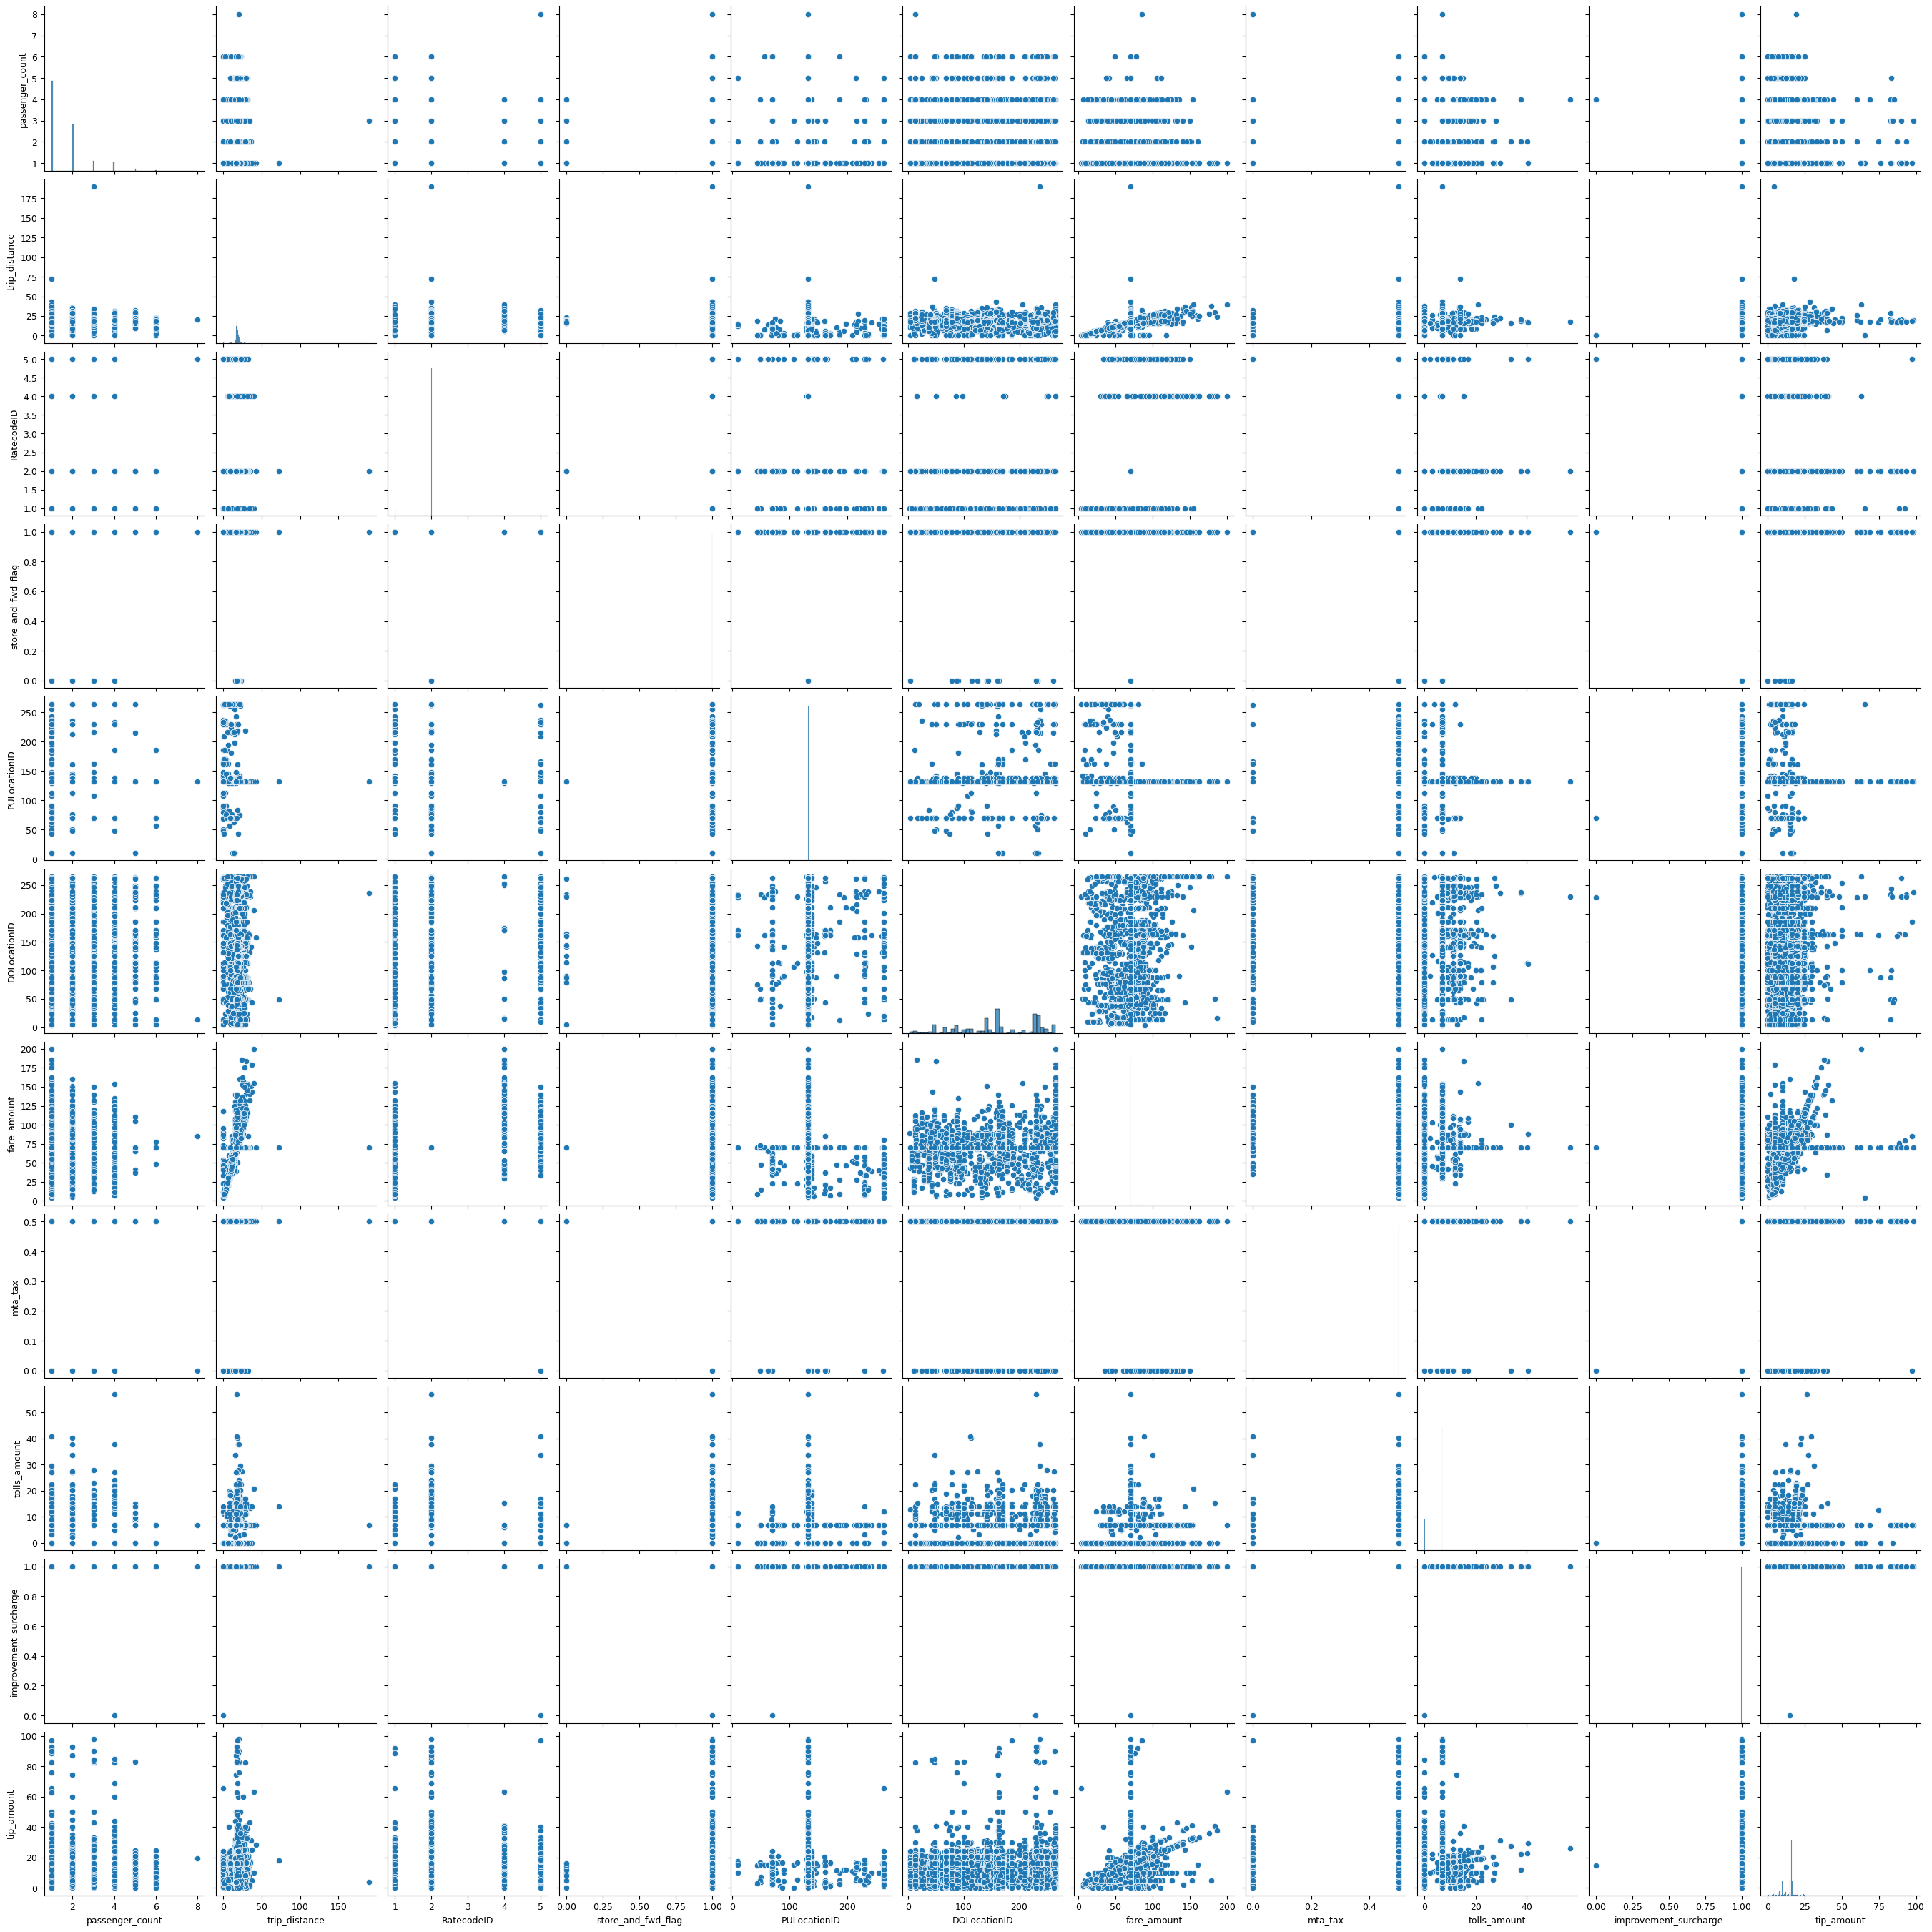

In [0]:
sns.pairplot(data = df.drop(columns = ['VendorID', 'payment_type']))
plt.show()

This shows us that the input features payment_type, VendorID, store_and_fwd_flag and improvement_surcharge have little to no correlation with the target variable.

### Preprocessing the data

Dropping redundant columns

In [0]:
df = df.drop(columns = ['VendorID', 'payment_type'])

Extract the input features and label

In [0]:
# Extract the labels
y = df[['tip_amount']].values.astype('float32')

# Drop the target variable from the feature matrix
proc_data = df.drop(columns = ['tip_amount'])

# Get the feature matrix used for training
X = proc_data.values

# Normalize the feature matrix
X = normalize(X, axis = 1, norm = 'l1', copy = False)
X

array([[0.00252481, 0.04451233, 0.00504961, ..., 0.0012624 , 0.01752216,
        0.00252481],
       [0.00212784, 0.04153545, 0.00425568, ..., 0.00106392, 0.01476721,
        0.00212784],
       [0.00356824, 0.0635504 , 0.00713649, ..., 0.00178412, 0.0247636 ,
        0.00356824],
       ...,
       [0.00271186, 0.04694237, 0.00542373, ..., 0.00135593, 0.01882034,
        0.00271186],
       [0.00215183, 0.03718368, 0.00430367, ..., 0.00107592, 0.01493372,
        0.00215183],
       [0.00249215, 0.04191796, 0.0049843 , ..., 0.00124607, 0.01729552,
        0.00249215]], shape=(41202, 10))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 33)
print(f'The shape X_train: {X_train.shape}')
print(f'The shape y_train: {y_train.shape}')
print(f'The shape X_test: {X_test.shape}')
print(f'The shape y_test: {y_test.shape}')

The shape X_train: (28841, 10)
The shape y_train: (28841, 1)
The shape X_test: (12361, 10)
The shape y_test: (12361, 1)


### Build a Decision Tree Regressor model

In [0]:
tree_regressor = DecisionTreeRegressor(
    criterion='squared_error', 
    max_depth=10, 
    min_samples_leaf=20,
    random_state=33
)
    
tree_regressor.fit(X_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",20
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",33
,"max_le

### Model Evaluation

In [0]:
# Predict the target variable in the test data
y_pred = tree_regressor.predict(X_test)

print(f'Mean Absolute error: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'Mean Squared error: {mean_squared_error(y_test, y_pred):.2f}')
print(f'Root men squared error: {root_mean_squared_error(y_test, y_pred):.2f}')
print(f'R2-score: {r2_score(y_test, y_pred):.2f}')

Mean Absolute error: 3.61
Mean Squared error: 24.61
Root men squared error: 4.96
R2-score: 0.02



### Conclusion

---

- The developed **Decision Tree Regressor** demonstrates **insufficient statistical robustness** and limited predictive capacity for this dataset. With an **R²-score of only 0.02**, the model fails to capture the variance in the target variable, indicating that the current configuration (likely too shallow) is underfitting the data and operating close to a simple baseline average.

- The correlation analysis reveals a lack of strong linear drivers for tipping behavior in the current feature set:
  
  - The variable `fare_amount` (+0.20) shows the highest positive coefficient, yet it remains a weak predictor. This suggests that while there is a slight tendency for higher fares to result in higher tips, the relationship is not deterministic enough for a simple tree to capture.
  
  - Unexpectedly, variables like `trip_distance` (+0.10) and `tolls_amount` (+0.11) showed negligible correlations, implying that trip length or cost complexity does not directly translate to tip size in this specific sample.
  
  - The presence of **NaN** correlations for `VendorID` and `payment_type` suggests these variables have zero variance (constant values) in the training set. If the data was filtered for Credit Card payments only (standard practice), this is expected; otherwise, it indicates a data quality issue that renders these features useless for splitting nodes.


- The **RMSE of 4.96** and **MAE of 3.61** suggest a high margin of error. On average, the predictions deviate by approximately $3.61 from the actual tip value. Given that many tips fall within the $0-$5 range, this error magnitude is substantial and indicates the need for feature engineering or a more complex model architecture (e.g., Random Forest or Gradient Boosting).